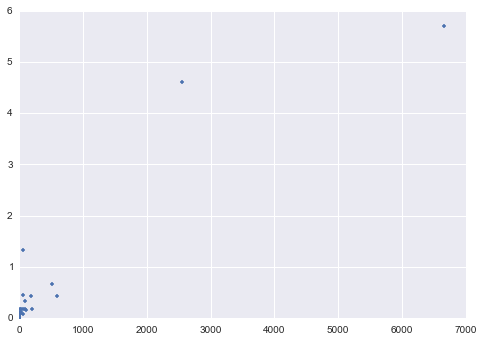

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

# read in the mammal dataset
wd = '../../datasets/msleep/'
mammals = pd.read_csv(wd+'msleep.csv')
mammals = mammals[mammals.brainwt.notnull()].copy()
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(mammals.bodywt, mammals.brainwt, '.')
# show the plot
plt.show()

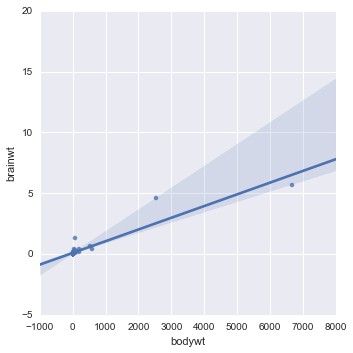

In [2]:
sns.lmplot('bodywt', 'brainwt', mammals)

In [3]:
log_columns = ['bodywt', 'brainwt',]
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

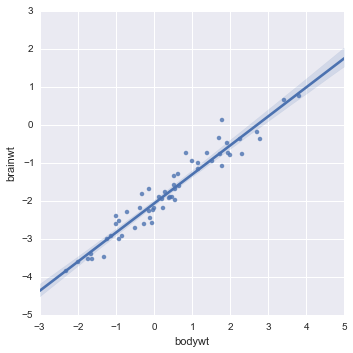

In [4]:
sns.lmplot('bodywt', 'brainwt', log_mammals)

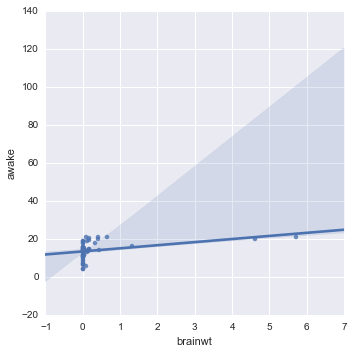

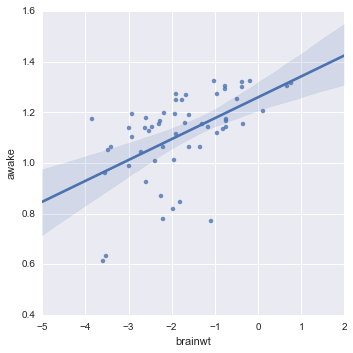

In [5]:
log_columns = ['bodywt', 'brainwt', 'awake', 'sleep_rem']  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

# one other example, using brainwt and awake.
x = 'brainwt'
y = 'awake'
sns.lmplot(x, y, mammals)
sns.lmplot(x, y, log_mammals)

P Values: [  9.15540205e-26]
Coefficients: [ 0.00096395]
y-intercept: 0.0859173102936
R-Squared: 0.871949198087


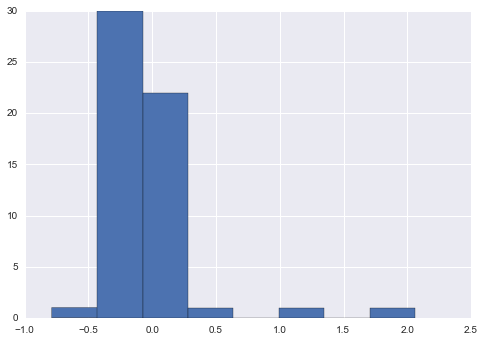

In [6]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # keep the model
    return algo

X = mammals[['bodywt']]
y = mammals['brainwt']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

In [7]:
# prediction at 0?
print lm.predict([[0]])

[ 0.08591731]


P Values: [  9.15540205e-26]
Coefficients: [ 0.00098291]
y-intercept: 0.0
R-Squared: 0.864418807451
[ 0.]


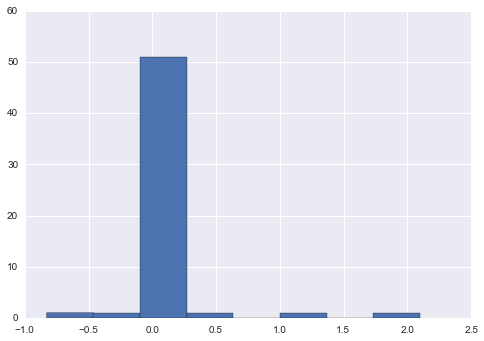

In [8]:
lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(X, y, lm)
# prediction at 0?
print lm.predict([[0]])

y-intercept: True
P Values: [  3.56282243e-33]
Coefficients: [ 0.76516177]
y-intercept: -2.07393164084
R-Squared: 0.931851615367

y-intercept: False
P Values: [  3.56282243e-33]
Coefficients: [ 0.35561441]
y-intercept: 0.0
R-Squared: -2.41053211437



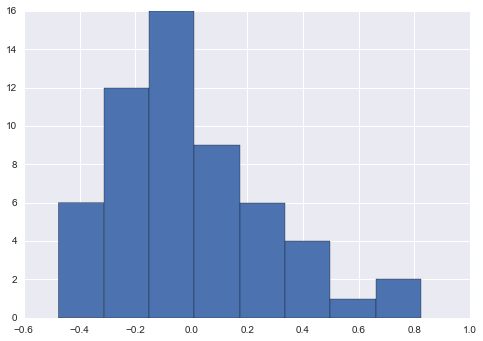

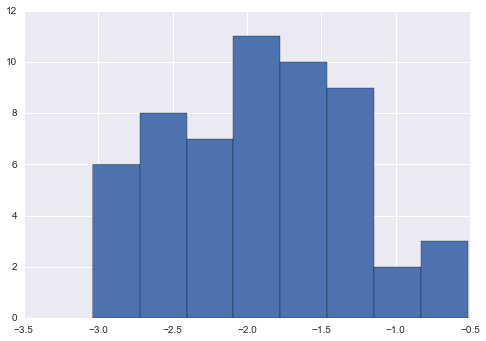

In [9]:
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']
loop = [True, False]
for boolean in loop:
    print 'y-intercept:', boolean
    lm = linear_model.LinearRegression(fit_intercept=boolean)
    get_linear_model_metrics(X, y, lm)
    print


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute='auto', tol=0.0001,
   warm_start=False)
P Values: [  3.56282243e-33]
Coefficients: [ 0.23454772]
y-intercept: -1.85931606304
R-Squared: 0.483728109403

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)
P Values: [  3.56282243e-33]
Coefficients: [ 0.75797972]
y-intercept: -2.07102674342
R-Squared: 0.931769516561

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute='auto',
      tol=0.0001, warm_start=False)
P Values: [  3.56282243e-33]
Coefficients: [ 0.39504621]
y-intercept: -1.9242323166
R-Squared: 0.71382228495



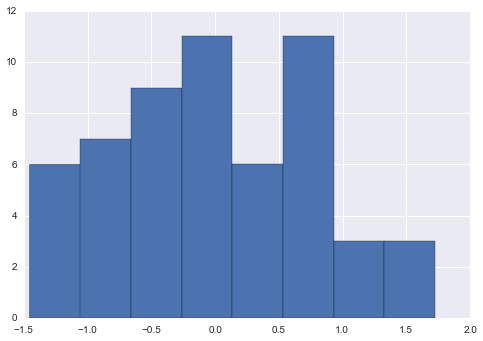

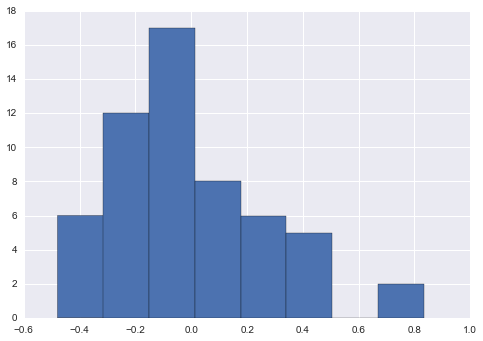

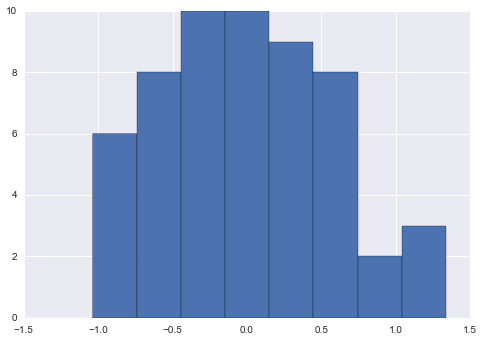

In [10]:
# loading other sklearn regression estimators
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']

estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print est
    get_linear_model_metrics(X, y, est)
    print


            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000
Axes(0.125,0.125;0.62x0.775)


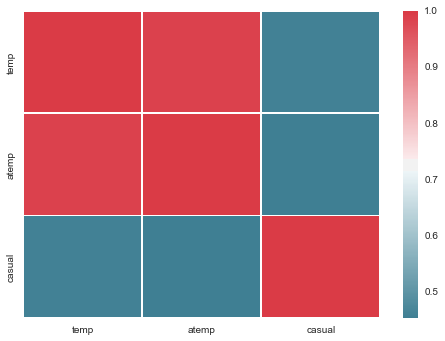

In [11]:
wd = '../../datasets/bikeshare/'
bike_data = pd.read_csv(wd+'bikeshare.csv')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = bike_data[['temp', 'atemp', 'casual']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)


temp
P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163

atemp
P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733

temp, atemp
P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661



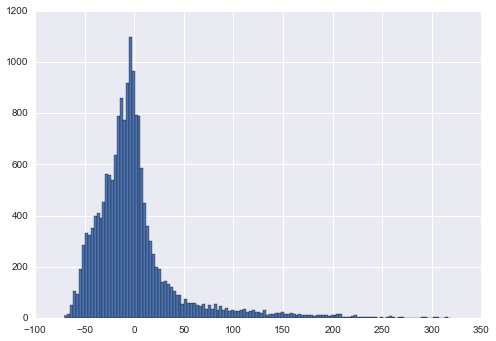

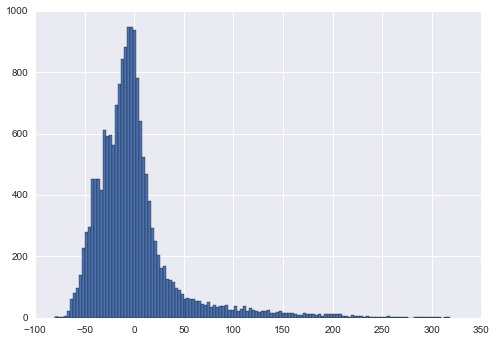

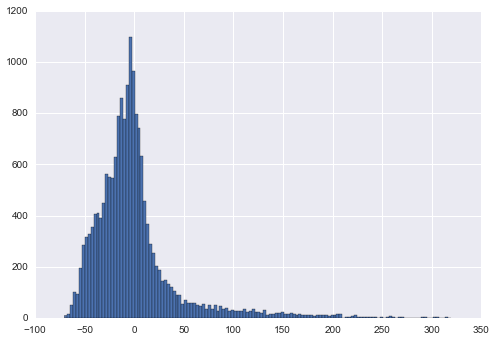

In [12]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

P Values: [ 0.  0.]
Coefficients: [ 112.02457031  -80.87301833]
y-intercept: 30.7273338581
R-Squared: 0.310901196913


LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

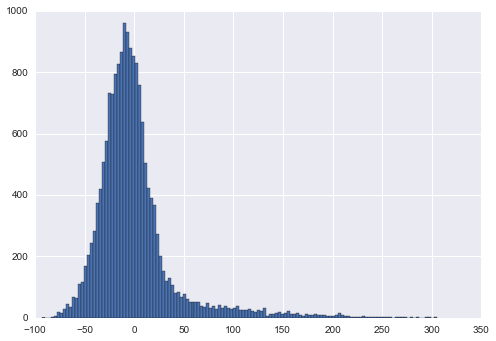

In [13]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())


P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [  4.05237297e+12   4.05237297e+12   4.05237297e+12   4.05237297e+12]
y-intercept: -4.05237297302e+12
R-Squared: 0.0233498651216

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666652
R-Squared: 0.0233906873841


LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

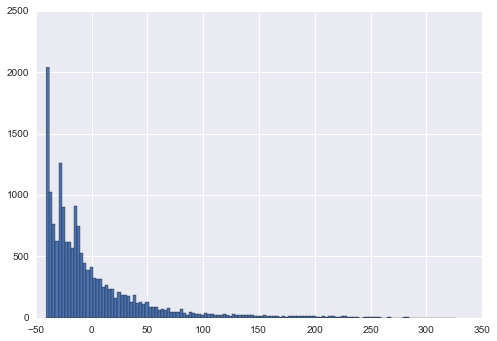

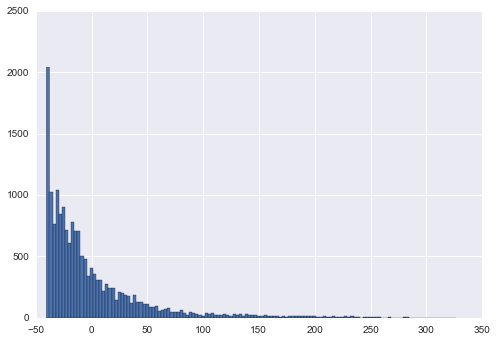

In [14]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)
get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)
print
# drop the least significant, weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)


In [15]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

               temp       hum  windspeed  weather_1  weather_2  weather_3  \
temp       1.000000 -0.069881  -0.023125   0.101044  -0.069657  -0.062406   
hum       -0.069881  1.000000  -0.290105  -0.383425   0.220758   0.309737   
windspeed -0.023125 -0.290105   1.000000   0.005150  -0.049241   0.070018   
weather_1  0.101044 -0.383425   0.005150   1.000000  -0.822961  -0.412414   
weather_2 -0.069657  0.220758  -0.049241  -0.822961   1.000000  -0.177417   
weather_3 -0.062406  0.309737   0.070018  -0.412414  -0.177417   1.000000   
holiday   -0.027340 -0.010588   0.003988   0.009167   0.004910  -0.023664   
hour_1    -0.040738  0.083197  -0.053580   0.008819  -0.006750  -0.005379   
hour_2    -0.045627  0.096198  -0.060241   0.005156  -0.003921  -0.002518   
hour_3    -0.046575  0.108659  -0.065444  -0.001685   0.003843  -0.003117   
hour_4    -0.053459  0.121990  -0.057285  -0.000450   0.000506   0.000096   
hour_5    -0.065571  0.124406  -0.067411  -0.004791   0.011541  -0.010083   

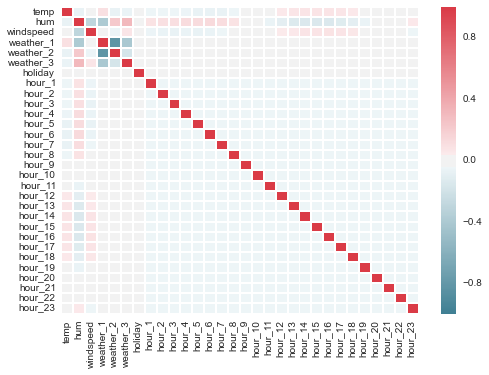

In [16]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)
weather.columns = ['weather_' + str(i) for i in weather.columns]

hours = pd.get_dummies(bike_data.hr)
hours.columns = ['hour_' + str(i) for i in hours.columns]

season = pd.get_dummies(bike_data.season)
season.columns = ['season_' + str(i) for i in season.columns]


bikemodel_data = bike_data.join(weather) # add in the three weather situations
bikemodel_data = bikemodel_data.join(hours)
bikemodel_data = bikemodel_data.join(season)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

columns_to_keep = ['temp', 'hum', 'windspeed', 'weather_1', 'weather_2', 'weather_3', 'holiday',]
columns_to_keep.extend(['hour_' + str(i) for i in range(1, 24)])

correlations = bikemodel_data[columns_to_keep].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)


P Values: [  0.00000000e+000   0.00000000e+000   6.25145011e-042   1.57667763e-073
   4.65438461e-010   3.08091550e-101   2.20669338e-002   1.25728221e-104
   3.16654620e-163   4.43205469e-255   0.00000000e+000   3.66634752e-318
   3.16291935e-139   3.91327381e-023   9.32021985e-003   9.53413879e-015
   4.01378046e-040   4.59689993e-069   1.30604357e-088   2.17178403e-095
   4.76632477e-102   2.13478631e-102   1.40997159e-103   2.82538157e-111
   4.92524377e-072   3.32332548e-040   8.58150979e-015   8.05106387e-005
   8.94334883e-001   3.52782886e-010]
Coefficients: [ 1.39992395 -0.17131354 -0.20002631  0.34352631  0.30454615  0.04057632
  0.09642558 -0.17206716 -0.29358905 -0.45666811 -0.56384339 -0.51128227
 -0.20345845  0.14547477  0.41019893  0.49556031  0.58424565  0.64459331
  0.67380301  0.66772066  0.67010005  0.66693083  0.67581876  0.71331101
  0.63016542  0.54417099  0.44181116  0.3696454   0.29103977  0.16696525]
y-intercept: 0.035226860082
R-Squared: 0.746123323863


LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

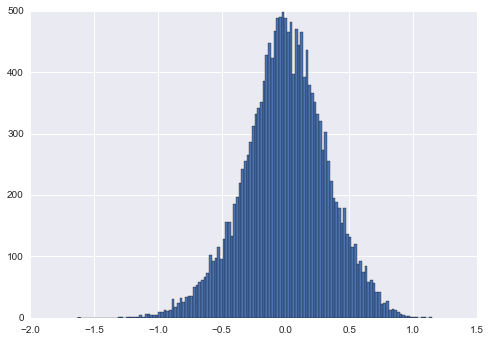

In [17]:
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, np.log10(y+1), lm)